<a href="https://colab.research.google.com/github/Rohan5076/practice-code/blob/main/vgg19_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report

## Defining data paths

In [2]:
train_path = r'/content/drive/MyDrive/assignment scivers/jpeg_model/train1'
test_path = r'/content/drive/MyDrive/assignment scivers/jpeg_model/test1'


## Converting image to pixels

negative


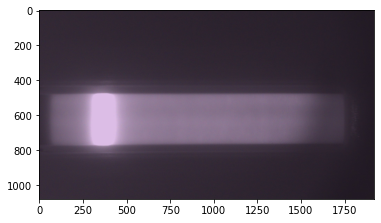

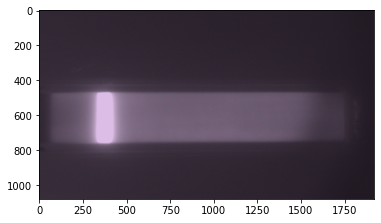

positive


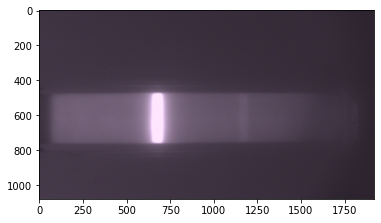

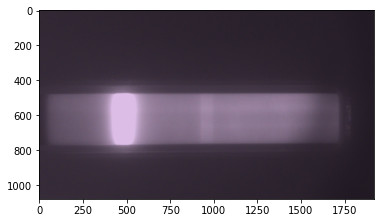

In [3]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [4]:
def imagearray(path, size):
    data = []
    for folder in os.listdir(path):
        sub_path=path+"/"+folder

        for img in os.listdir(sub_path):
            image_path=sub_path+"/"+img
            img_arr=cv2.imread(image_path)
            img_arr=cv2.resize(img_arr, size)
            data.append(img_arr)
            
    return data

In [6]:
size = (250,250)

train = imagearray(train_path, size)
test = imagearray(test_path, size)


# Normalization

In [7]:
x_train = np.array(train)
x_test = np.array(test)


In [8]:
x_train = x_train/255.0
x_test = x_test/255.0


# Defining target variables

In [9]:
def data_class(data_path, size, class_mode):
    datagen = ImageDataGenerator(rescale = 1./255)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 32,
                                          class_mode = class_mode)
    return classes

In [10]:
train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')


Found 90 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [11]:
y_train = train_class.classes
y_test = test_class.classes


In [12]:
train_class.class_indices

{'negative': 0, 'positive': 1}

In [13]:

y_train.shape,y_test.shape

((90,), (20,))

## VGG19 Model

In [17]:
vgg = VGG19(input_shape = (250, 250, 3), weights = 'imagenet',  include_top = False)


In [18]:
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(2, activation='sigmoid')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

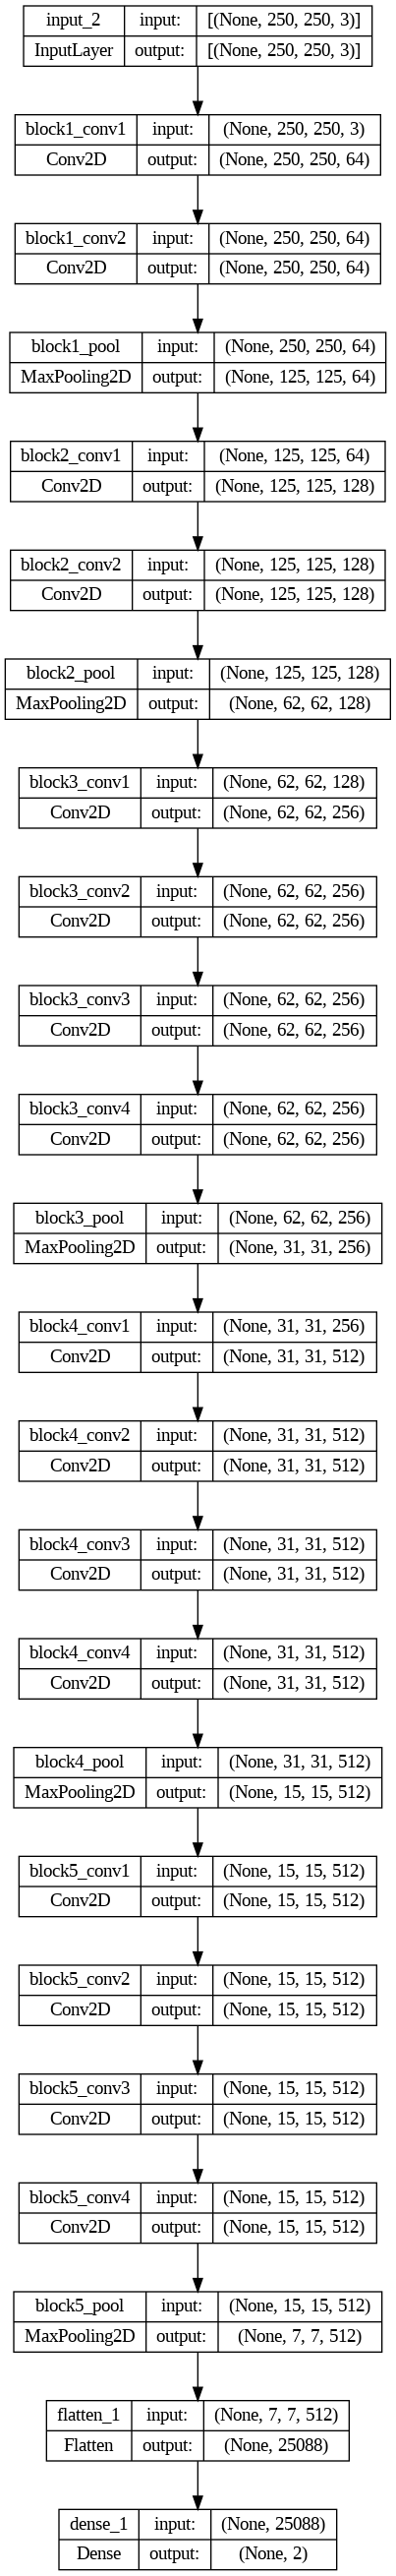

In [19]:

plot_model(model=model, show_shapes=True)

In [21]:
early_stop = EarlyStopping(monitor = 'test_loss', mode='min', verbose = 1, patience = 5)


In [22]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, callbacks=[early_stop], batch_size = 30,
                    shuffle=True)

Epoch 1/10
3/3 [==============================] - ETA: 0s - loss: 1.5761 - accuracy: 0.5444 

3/3 [==============================] - 88s 31s/step - loss: 1.5761 - accuracy: 0.5444 - val_loss: 0.8022 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - ETA: 0s - loss: 0.9613 - accuracy: 0.5444 

3/3 [==============================] - 86s 31s/step - loss: 0.9613 - accuracy: 0.5444 - val_loss: 0.5251 - val_accuracy: 0.7500
Epoch 3/10
3/3 [==============================] - ETA: 0s - loss: 0.7657 - accuracy: 0.5111 

3/3 [==============================] - 90s 33s/step - loss: 0.7657 - accuracy: 0.5111 - val_loss: 0.4949 - val_accuracy: 0.8000
Epoch 4/10
3/3 [==============================] - ETA: 0s - loss: 0.6142 - accuracy: 0.7222 

3/3 [==============================] - 86s 31s/step - loss: 0.6142 - accuracy: 0.7222 - val_loss: 0.6619 - val_accuracy: 0.7000
Epoch 5/10
3/3 [==============================] - ETA: 0s - loss: 0.5872 - accuracy: 0.7667 

3/3 [==============================] - 86s 31s/step - loss: 0.5872 - accuracy: 0.7667 - val_loss: 0.4788 - val_accuracy: 0.8000
Epoch 6/10
3/3 [==============================] - ETA: 0s - loss: 0.5183 - accuracy: 0.5667 

3/3 [==============================] - 91s 34s/step - loss: 0.5183 - accuracy: 0.5667 - val_loss: 0.3530 - val_accuracy: 0.8500
Epoch 7/10
3/3 [==============================] - ETA: 0s - loss: 0.4397 - accuracy: 0.8000 

3/3 [==============================] - 87s 32s/step - loss: 0.4397 - accuracy: 0.8000 - val_loss: 0.3689 - val_accuracy: 0.8500
Epoch 8/10
3/3 [==============================] - ETA: 0s - loss: 0.4299 - accuracy: 0.8111 

3/3 [==============================] - 86s 32s/step - loss: 0.4299 - accuracy: 0.8111 - val_loss: 0.3590 - val_accuracy: 0.9000
Epoch 9/10
3/3 [==============================] - ETA: 0s - loss: 0.4052 - accuracy: 0.8556 

3/3 [==============================] - 90s 33s/step - loss: 0.4052 - accuracy: 0.8556 - val_loss: 0.3142 - val_accuracy: 0.8500
Epoch 10/10
3/3 [==============================] - ETA: 0s - loss: 0.4226 - accuracy: 0.8222 

3/3 [==============================] - 86s 31s/step - loss: 0.4226 - accuracy: 0.8222 - val_loss: 0.3049 - val_accuracy: 0.8500


## Visualization

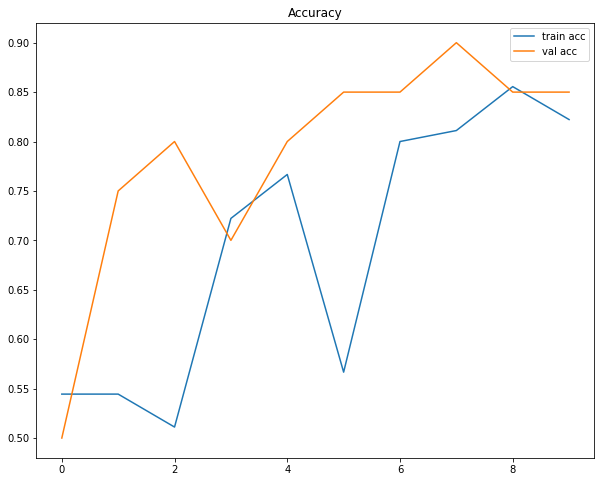

In [23]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

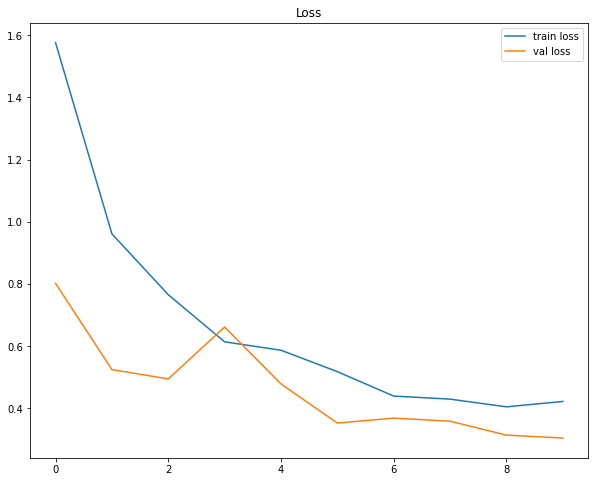

In [24]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

# Model Evaluation

In [25]:
model.evaluate(x_test, y_test, batch_size=32)

1/1 [==============================] - 16s 16s/step - loss: 0.3049 - accuracy: 0.8500


[0.30488321185112, 0.8500000238418579]

In [26]:
y_pred = model.predict(x_test)

1/1 [==============================] - 17s 17s/step


In [27]:
y_pred=np.argmax(y_pred,axis=1)

In [28]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.70      1.00      0.82         7

    accuracy                           0.85        20
   macro avg       0.85      0.88      0.85        20
weighted avg       0.89      0.85      0.85        20



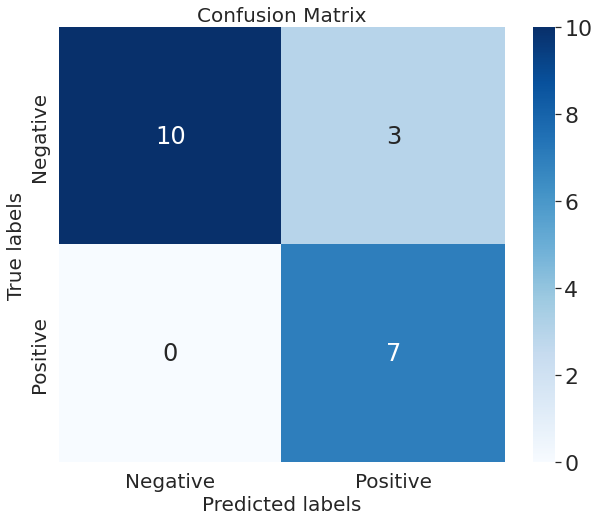

In [30]:
cm = confusion_matrix(y_pred,y_test)

plt.figure(figsize=(10, 8))
ax = plt.subplot()
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20);ax.set_ylabel('True labels', fontsize=20); 
ax.set_title('Confusion Matrix', fontsize=20); 
ax.xaxis.set_ticklabels(['Negative', 'Positive'], fontsize=20); ax.yaxis.set_ticklabels(['Negative', 'Positive'], fontsize=20);


In [35]:
from sklearn.metrics import f1_score,recall_score,precision_score

In [33]:
f1_score(y_test, y_pred, average='micro')

0.85

In [36]:
recall_score(y_test, y_pred, average='weighted')

0.85

In [37]:
precision_score(y_test, y_pred, average='micro')

0.85

## Saving Model

In [38]:
model.save("/content/drive/MyDrive/assignment scivers/jpeg_model")